# Summarization Comparison

### Imports

In [1]:
import transformers
if (transformers.__version__ != '3.1.0'):
  !pip install -U transformers kaggle

In [2]:
import numpy as np

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import pandas as pd
import time
import gc

In [3]:
#from transformers import pipeline; print(pipeline('sentiment-analysis')('I hate you'))

### Read in Data
Reads in the 3 csv files, drops unneeded columns, then concatenates them together. 

In [4]:
# from google.colab import files

# Uncomment this line to upload data file
# uploaded = files.upload()

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [7]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  ...                                            content
0               0  ...  WASHINGTON  —   Congressional Republicans have...
1               1  ...  After the bullet shells get counted, the blood...
2               2  ...  When Walt Disney’s “Bambi” opened in 1942, cri...
3               3  ...  Death may be the great equalizer, but it isn’t...
4               4  ...  SEOUL, South Korea  —   North Korea’s leader, ...
...           ...  ...                                                ...
49995       53287  ...  As chairman and CEO of ExxonMobil, Rex Tillers...
49996       53288  ...  I’ve spent nearly 20 years looking at intellig...
49997       53289  ...    Donald Trump will not be taking necessary st...
49998       53290  ...  Dozens of   colleges could be forced to close ...
49999       53291  ...  The force of gravity can be described using a ...

[50000 rows x 10 columns]>

## Summarizing Using Different Models

Used different models through huggingface's transformers

### T5

In [8]:
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [9]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=512, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_T5 = tokenizer.decode(outputs[0])
end = time.time()
t5_time = (end - start)
print(t5_time)

17.31364130973816


In [10]:
del tokenizer
del model
gc.collect()

584

### BERT

In [11]:
model = AutoModelWithLMHead.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:821: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some wei

In [12]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=100, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_BERT = tokenizer.decode(outputs[0])
end = time.time()
BERT_time = (end-start)
print(BERT_time)

96.90765404701233


In [13]:
del tokenizer
del model
gc.collect()

0

### GPT 

In [14]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:821: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [15]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_GPT = tokenizer.decode(outputs[0])
end = time.time()
GPT_time = (end - start)
print(GPT_time)

2.648932695388794


In [16]:
del tokenizer
del model
gc.collect()

0

### DistilBERT

In [17]:
model = AutoModelWithLMHead.from_pretrained('distilgpt2')
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:821: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [18]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_DistilBERT = tokenizer.decode(outputs[0])
end = time.time()
DistilBERT_time = (end - start)
print(DistilBERT_time)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


1.7898578643798828


In [19]:
del tokenizer
del model
gc.collect()

0

### GPT2

In [20]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")

/usr/local/lib/python3.6/dist-packages/transformers/modeling_auto.py:821: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [21]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=149, truncation=True)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_GPT2 = tokenizer.decode(outputs[0])
end = time.time()
GPT2_time = (end - start)
print(GPT2_time)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


2.830915927886963


In [22]:
del tokenizer
del model
gc.collect()

0

### T5 Trained on Wikihow

In [23]:
model = AutoModelForSeq2SeqLM.from_pretrained("deep-learning-analytics/wikihow-t5-small")
tokenizer = AutoTokenizer.from_pretrained("deep-learning-analytics/wikihow-t5-small")

In [24]:
start = time.time()
inputs = tokenizer.encode("summarize: " + df.iloc[0]['content'], return_tensors="pt", max_length=1024, truncation=True)
outputs = model.generate(inputs, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_T5_wikihow = tokenizer.decode(outputs[0])
end = time.time()
t5_wikihow_time = (end - start)
print(t5_wikihow_time)

4.519234657287598


In [25]:
del tokenizer
del model
gc.collect()

318

### Pegasus NewsRoom

In [26]:
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-newsroom")
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-newsroom")

In [27]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=200, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_newsroom = tgt_text[0]
pegasus_newsroom_time = (end - start)
print(pegasus_newsroom_time)

35.92016124725342


In [28]:
del tokenizer
del model
gc.collect()

1375

### Pegasus CNN Daily Mail

In [29]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")

In [30]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=200, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_cnn = tgt_text[0]
pegasus_cnn_time = (end - start)
print(pegasus_cnn_time)

84.74882459640503


In [31]:
del tokenizer
del model
gc.collect()

1375

### Pegasus Multi News

In [32]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-multi_news")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-multi_news")

In [33]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=100, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_multi = tgt_text[0]
pegasus_multi_time = (end - start)
print(pegasus_multi_time)

226.9620771408081


In [34]:
del tokenizer
del model
gc.collect()

1375

### Pegasus Billsum

In [35]:
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-billsum")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-billsum")

In [36]:
start = time.time()
batch = tokenizer.prepare_seq2seq_batch(df['content'].tolist()[:1], max_target_length=100, padding='longest')
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
end = time.time()
decoded_pegasus_billsum = tgt_text[0]
pegasus_billsum_time = (end - start)
print(pegasus_billsum_time)

88.71667456626892


In [37]:
del tokenizer
del model
gc.collect()

1375

## Results Analysis

### Print All Decoded Summaries

In [38]:
decoded_BERT

'[CLS] summarize : WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration : They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration ’ s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably cause the health care [SEP] If - - - - - - - - - - - - that the situation changes when - - - - - - - - - - - - - - - - - If the situation changes, the situation changes. - - - - - -'

In [39]:
decoded_T5

'a sudden loss of the disputed subsidies could conceivably cause the health care program to implode. that could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. the incoming Trump administration could choose to no longer defend the executive branch against the suit.'

In [40]:
decoded_DistilBERT

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [41]:
decoded_GPT

'summarize : washington <unk>congressional republicans have a new fear when it comes to their health care lawsuit against the obama administration : they might win. the incoming trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration <unk>s authority to spend billions of dollars on health insurance subsidies for and americans, handing house republicans a big victory on issues. but a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before republicans have prepared a replacement. that could lead to chaos in the insurance market and spur a political backlash just as republicans gain full control of the government. to stave off that outcome, republicans could find a'

In [42]:
decoded_DistilBERT

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [43]:
decoded_T5_wikihow

'Defend the health care lawsuit against the Obama administration.Consider a temporary suspension'

In [44]:
decoded_GPT2

'summarize: WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government.'

In [45]:
decoded_pegasus_newsroom

'Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win.'

In [46]:
decoded_pegasus_cnn

'The incoming Trump administration could choose to no longer defend the executive branch against the suit.<n>A sudden loss of the disputed subsidies could conceivably cause the health care program to implode.<n>Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law.'

In [47]:
decoded_pegasus_multi

"– A lawsuit brought by House Republicans against the Obama administration over ObamaCare could cost the government up to $13 billion, the New York Times reports. The lawsuit, which has been put on hold since Donald Trump's election victory, claims the Obama administration is violating the Constitution by making subsidies available to people who don't have health insurance. House Republicans say Congress never appropriated the money for the subsidies, which are paid to insurance companies to help defray costs for low- and middle-income people. The Obama administration says the subsidies are a permanent part of the Affordable Care Act, even though Congress never appropriated the money for them. If the subsidies are cut off, millions of low- and middle-income people could lose their insurance. The House Republicans' lawsuit has been seeking to stop the subsidies, and they have asked the Obama administration to stop paying them until the case is resolved. The Justice Department has refuse

In [48]:
decoded_pegasus_billsum

'Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: the incoming Trump administration could choose to no longer defend the executive branch against the challenges to which the Department of the Treasury has been put in until at least late by the United States Court of Appeals for the District of Columbia Circuit; and the transition team for the President will evaluate this case and all related aspects of the Affordable Care Act.'

### Charts

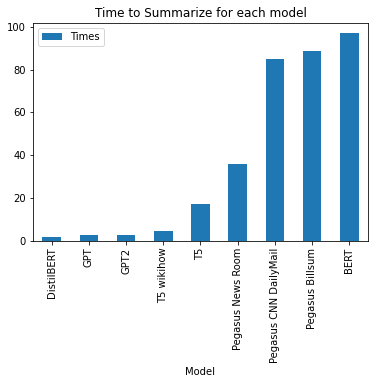

In [49]:
import matplotlib.pyplot as plot
time_array = {
    'Model': ["BERT", "T5", "DistilBERT", "GPT", "GPT2", "T5 wikihow", "Pegasus News Room", "Pegasus CNN DailyMail", "Pegasus Billsum"], 
    'Times': [BERT_time, t5_time, DistilBERT_time, GPT_time, GPT2_time, t5_wikihow_time, pegasus_newsroom_time, pegasus_cnn_time, pegasus_billsum_time]
    }
df_time = pd.DataFrame(data=time_array)
df_time.sort_values('Times').plot.bar(x="Model", y="Times", title="Time to Summarize for each model")
plot.show()

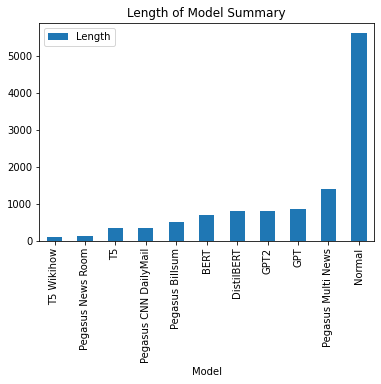

In [50]:
length_dict = {
    "Model": ["Normal", "BERT", "T5", "DistilBERT", "GPT", "GPT2", "T5 Wikihow", "Pegasus News Room", "Pegasus CNN DailyMail", "Pegasus Multi News", "Pegasus Billsum"], 
    "Length": [
               (len(df.iloc[0]['content'])),
               (len(decoded_BERT)), (len(decoded_T5)),
               (len(decoded_DistilBERT)),
               (len(decoded_GPT)),
               (len(decoded_GPT2)),
               (len(decoded_T5_wikihow)),
               (len(decoded_pegasus_newsroom)),
               (len(decoded_pegasus_cnn)),
               (len(decoded_pegasus_multi)),
               (len(decoded_pegasus_billsum)),
               ]
  }
df_length = pd.DataFrame(data=length_dict)
df_length.sort_values('Length').plot.bar(x="Model", y="Length", title="Length of Model Summary")
plot.show()

### ROGUE Metrics